<a href="https://colab.research.google.com/github/kadirov1194/FineTuned_Swin_Transformer/blob/main/Finetuning_Swin_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import csv
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from scipy import integrate as intg

with open("/content/Book1.csv",'r') as i:           #open a file in directory of this script for reading 
    rawdata = list(csv.reader(i,delimiter=","))   #make a list of data in file
    
exampledata = np.array(rawdata[1:],dtype=np.float)    #convert to data array
xdata = exampledata[:,0]
ydata = exampledata[:,1]

plt.figure(1,dpi=120)
plt.yscale('linear')
plt.xscale('linear')
#plt.xlim(0,4)
#plt.ylim(0,2.5)
plt.title("ViT Transformer")
plt.xlabel(rawdata[0][0])
plt.ylabel(rawdata[0][1])
plt.plot(xdata,ydata,label="Validation loss")

def func(x,b):                                   #input x in nm and b in nm^-1
    return a0 * np.exp(-b * x) + a1

a0 = 2.5    #W m^-2 nm^-1
a1 = 0.5    #W m^-2 nm^-1

funcdata = func(xdata,1.375)                 #Generate & Plot data for comparison
plt.plot(xdata,funcdata,label="Training loss")   
plt.legend()

popt, pcov = curve_fit(func,xdata,ydata,bounds=(0,4))
perr = np.sqrt(np.diag(pcov))

TotalInt = intg.trapz(ydata,xdata)                     #Compute numerical integral
TotalInt_func = intg.quad(func,0,4, args=(1.375))[0]        #Compute integral of function
low_Frac = intg.quad(func,0,2, args=(1.375))[0]/TotalInt_func
high_Frac = intg.quad(func,2,4, args=(1.375))[0]/TotalInt_func

FileNotFoundError: ignored

<ipython-input-5-f48a8a9b7d6a>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  exampledata = np.array(rawdata[1:],dtype=np.float)    #convert to data array


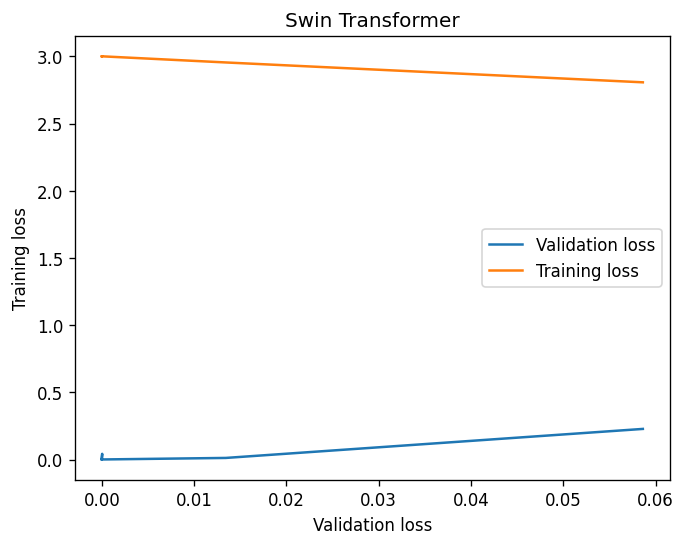

In [ ]:
import numpy as np
import csv
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from scipy import integrate as intg

with open("/content/Book2.csv",'r') as i:           #open a file in directory of this script for reading 
    rawdata = list(csv.reader(i,delimiter=","))   #make a list of data in file
    
exampledata = np.array(rawdata[1:],dtype=np.float)    #convert to data array
xdata = exampledata[:,0]
ydata = exampledata[:,1]

plt.figure(1,dpi=120)
plt.yscale('linear')
plt.xscale('linear')
#plt.xlim(0,4)
#plt.ylim(0,2.5)
plt.title("Swin Transformer")
plt.xlabel(rawdata[0][0])
plt.ylabel(rawdata[0][1])
plt.plot(xdata,ydata,label="Validation loss")

def func(x,b):                                   #input x in nm and b in nm^-1
    return a0 * np.exp(-b * x) + a1

a0 = 2.5    #W m^-2 nm^-1
a1 = 0.5    #W m^-2 nm^-1

funcdata = func(xdata,1.375)                 #Generate & Plot data for comparison
plt.plot(xdata,funcdata,label="Training loss")   
plt.legend()

popt, pcov = curve_fit(func,xdata,ydata,bounds=(0,4))
perr = np.sqrt(np.diag(pcov))

TotalInt = intg.trapz(ydata,xdata)                     #Compute numerical integral
TotalInt_func = intg.quad(func,0,4, args=(1.375))[0]        #Compute integral of function
low_Frac = intg.quad(func,0,2, args=(1.375))[0]/TotalInt_func
high_Frac = intg.quad(func,2,4, args=(1.375))[0]/TotalInt_func

In [ ]:
!nvidia-smi

Mon Apr 24 03:51:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 13.6 MB/s eta 0:00:00


In [ ]:
!unzip /content/Dementia_Dataset.zip

unzip:  cannot find or open /content/Dementia_Dataset.zip, /content/Dementia_Dataset.zip.zip or /content/Dementia_Dataset.zip.ZIP.


In [ ]:
from datasets import load_dataset

ds = load_dataset('/content/Dementia_Dataset')
ds

Resolving data files:   0%|          | 0/315 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/316 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/315 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/Dementia_Dataset-70bc54145068df17/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 315
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 316
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 315
    })
})

In [ ]:
!pip install git-lfs huggingface-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from datasets import load_dataset

# loading the dataset
ds = load_dataset('/content/Dementia_Dataset')

Resolving data files:   0%|          | 0/315 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/316 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/315 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
ex = ds['train'][104]

In [ ]:
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=152x158 at 0x7F5B6947C1F0>,
 'label': 0}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

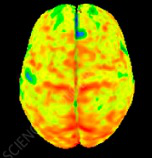

In [ ]:
image = ex['image']
image

In [ ]:
image.size

(152, 158)

In [ ]:
labels = ds['train'].features['label']
labels

ClassLabel(names=['DEMENTED', 'NON_DEMENTED'], id=None)

In [ ]:
labels.int2str(ex['label'])

'DEMENTED'

In [ ]:
from transformers import AutoFeatureExtractor

#loading the feature extractor
model_name = 'microsoft/swin-base-patch4-window7-224'
# model_name = 'zuppif/maskformer-swin-small-ade'
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)

/usr/local/lib/python3.9/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 315
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 316
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 315
    })
})

In [ ]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x.convert('RGB') for x in example_batch['image']], return_tensors='pt')
    inputs['label'] = example_batch['label']
    return inputs

In [ ]:
# applying transform
prepared_ds = ds.with_transform(transform)

In [ ]:
prepared_ds["train"][0]["pixel_values"].shape

torch.Size([3, 224, 224])

In [ ]:
import torch

def collate_fn(batch):
  #data collator
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
  # getting the accuracy metric to use later
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

<ipython-input-28-6d955217a9d2>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
from transformers import SwinForImageClassification, Trainer, TrainingArguments

labels = ds['train'].features['label'].names
# initialzing the model
model = SwinForImageClassification.from_pretrained(
    model_name,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)},
    ignore_mismatched_sizes = True,
)

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.swin.layernorm
# model.layers[-1].blocks[-1].norm1

LayerNorm((1024,), eps=1e-05, elementwise_affine=True)

In [ ]:
model

SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfO

In [ ]:
!pip install torch-summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchsummary import summary
summary(model, (3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─SwinModel: 1-1                         [[-1, 1024]]              --
|    └─SwinEmbeddings: 2-1               [-1, 3136, 128]           --
|    |    └─SwinPatchEmbeddings: 3-1     [-1, 3136, 128]           6,272
|    |    └─LayerNorm: 3-2               [-1, 3136, 128]           256
|    |    └─Dropout: 3-3                 [-1, 3136, 128]           --
|    └─SwinEncoder: 2-2                  [[-1, 49, 1024]]          --
|    └─LayerNorm: 2-3                    [-1, 49, 1024]            2,048
|    └─AdaptiveAvgPool1d: 2-4            [-1, 1024, 1]             --
├─Linear: 1-2                            [-1, 2]                   2,050
Total params: 10,626
Trainable params: 10,626
Non-trainable params: 0
Total mult-adds (M): 278.90
Input size (MB): 0.57
Forward/backward pass size (MB): 6.51
Params size (MB): 0.04
Estimated Total Size (MB): 7.12


Layer (type:depth-idx)                   Output Shape              Param #
├─SwinModel: 1-1                         [[-1, 1024]]              --
|    └─SwinEmbeddings: 2-1               [-1, 3136, 128]           --
|    |    └─SwinPatchEmbeddings: 3-1     [-1, 3136, 128]           6,272
|    |    └─LayerNorm: 3-2               [-1, 3136, 128]           256
|    |    └─Dropout: 3-3                 [-1, 3136, 128]           --
|    └─SwinEncoder: 2-2                  [[-1, 49, 1024]]          --
|    └─LayerNorm: 2-3                    [-1, 49, 1024]            2,048
|    └─AdaptiveAvgPool1d: 2-4            [-1, 1024, 1]             --
├─Linear: 1-2                            [-1, 2]                   2,050
Total params: 10,626
Trainable params: 10,626
Non-trainable params: 0
Total mult-adds (M): 278.90
Input size (MB): 0.57
Forward/backward pass size (MB): 6.51
Params size (MB): 0.04
Estimated Total Size (MB): 7.12

In [ ]:
batch_size = 16
# Defining training arguments (set push_to_hub to false if you don't want to upload it to HuggingFace's model hub)
training_args = TrainingArguments(
    f"swin-finetuned-food101",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=4e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False,
)

In [ ]:
# Instantiate the Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=feature_extractor,
)

In [ ]:
# Train and save results
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.423900,0.318264,0.885714
2,0.255200,0.116102,0.961905
3,0.122800,0.047661,0.990476
4,0.044700,0.019179,0.990476
5,0.038900,0.013825,0.990476
6,0.032800,0.013589,0.990476
7,0.018400,0.012633,0.990476
8,0.019600,0.010107,1.000000
9,0.010100,0.009130,0.990476
10,0.013000,0.009220,0.990476


***** train metrics *****
  epoch                    =        10.0
  total_flos               = 229839701GF
  train_loss               =       0.098
  train_runtime            =  0:03:30.38
  train_samples_per_second =      14.972
  train_steps_per_second   =       0.238


In [ ]:
# Evaluate on validation set
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =       10.0
  eval_accuracy           =        1.0
  eval_loss               =     0.0101
  eval_runtime            = 0:00:05.41
  eval_samples_per_second =     58.174
  eval_steps_per_second   =      3.694


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from PIL import Image
from transformers import SwinForImageClassification, SwinImageTokenizer

# Load the Swin Transformer model and tokenizer
model = SwinForImageClassification.from_pretrained('microsoft/Swin-Transformer-Base')
tokenizer = SwinTokenizer.from_pretrained('microsoft/Swin-Transformer-Base')

# Define the image transform
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the image and apply the transform
image = Image.open('dementia_image.jpg')
image_tensor = transform(image)

# Add batch dimension and pass the image through the model
output = model(image_tensor.unsqueeze(0))

# The output is a logits tensor, so apply softmax to get probabilities
probs = nn.functional.softmax(output, dim=1)

# Get the predicted label
predicted_label = torch.argmax(probs).item()

# Map the predicted label to a class name using the tokenizer
class_names = tokenizer.get_vocab()
predicted_class = class_names[predicted_label]

# Load the ground truth label and compute accuracy
ground_truth_label = 1  # Replace with the ground truth label
accuracy = (predicted_label == ground_truth_label)

# Print the predicted class and accuracy
print(f"Predicted class: {predicted_class}")
print(f"Accuracy: {accuracy}")


ImportError: ignored